# **Notebook PC#04 (Part B)**
# MLP classifier for the CIFAR-10 database.
#### Grid search for the hyperparameters. Code produced by previous students of IA353. Thank you for making PC#04 still more complete and informative.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Gabriel Toffanetto França da Rocha - 289320 <br>
**Aluno(a):** Maria Fernanda Paulino Gomes - 206745 <br>

In [ ]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import gc

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
def model_and_evaluate(n_neurons = 512,
                       n_layers  = 1,
                       dropout   = 0.25,
                       epochs    = 5,
                       optimizer = 'adam',
                       verbose   = 1):
    gc.collect()
    tf.keras.backend.clear_session()

    model = tf.keras.models.Sequential([
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(n_neurons,activation=tf.nn.relu),
          tf.keras.layers.Dropout(dropout)])

    if n_layers > 1:
        for _ in range(n_layers-1):
            model.add(tf.keras.layers.Dense(n_neurons,activation=tf.nn.relu))
            model.add(tf.keras.layers.Dropout(dropout))

    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=epochs, verbose=verbose)

    loss, accuracy = model.evaluate(x_test, y_test,verbose=verbose)

    if verbose:
        model.summary()
        # Evaluate the model on the test data using `evaluate`
        print("Evaluate on test data")
        print("test loss, test acc:", loss, accuracy)

    train_result = dict(n_neurons = n_neurons,
                        n_layers  = n_layers,
                        optimizer = optimizer,
                        dropout   = dropout,
                        epochs    = epochs,
                        loss      = loss,
                        accuracy  = accuracy)
    return loss, accuracy

In [ ]:
n_repetitions = 5
DEFAULT = {
    'n_neurons' : 512,
    'n_layers'  : 1,
    'dropout'   : 0.25,
    'epochs'    : 5,
    'optimizer' : 'adam'
}

df = pd.DataFrame(columns=['n_neurons', 'n_layers', 'dropout', 'epochs','optimizer'] + \
                          [f"{metric} {iteration}" for iteration in range(1, n_repetitions+1) for metric in ['loss', 'accuracy']])

In [ ]:
args = DEFAULT.copy()
row = list(args.values())
for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(verbose=0)

        row.append(loss)
        row.append(accuracy)
df.loc[0] = row

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
for n_neurons in [1024, 2048, 4096]:
    args = DEFAULT.copy()
    args['n_neurons'] = n_neurons

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(n_neurons=n_neurons, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'n_neurons={n_neurons}'] = row


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
for n_layers in [2, 3, 4]:
    args = DEFAULT.copy()
    args['n_layers'] = n_layers

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(n_layers=n_layers, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'n_layers={n_layers}'] = row

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
for dropout in [0, 0.5]:
    args = DEFAULT.copy()
    args['dropout'] = dropout

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(dropout=dropout, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'dropout={dropout}'] = row

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
for optimizer in ['RMSprop', 'SGD']:
    args = DEFAULT.copy()
    args['optimizer'] = optimizer

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(optimizer=optimizer, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'optimizer={optimizer}'] = row

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
for epochs in [10, 20, 30]:
    args = DEFAULT.copy()
    args['epochs'] = epochs

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(epochs=epochs, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'epochs={epochs}'] = row

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
df.to_csv('cifar10_PC04_MLP_analysis.csv',index=False)
df.head()

,n_neurons,n_layers,dropout,epochs,optimizer,loss 1,accuracy 1,loss 2,accuracy 2,loss 3,accuracy 3,loss 4,accuracy 4,loss 5,accuracy 5
0,512,1,0.25,5,adam,1.724917,0.3909,1.679064,0.3942,1.675461,0.4117,1.643609,0.4086,1.685976,0.3917
n_neurons=1024,1024,1,0.25,5,adam,1.654128,0.4121,1.669571,0.4111,1.682325,0.3903,1.633816,0.4135,1.640561,0.4078
n_neurons=2048,2048,1,0.25,5,adam,1.632170,0.4145,1.626898,0.4290,1.612662,0.4207,1.636626,0.4148,1.609891,0.4267
n_neurons=4096,4096,1,0.25,5,adam,1.587692,0.4396,1.669261,0.3907,1.609528,0.4278,1.629496,0.4115,1.617242,0.4331
n_layers=2,512,2,0.25,5,adam,1.792163,0.3357,1.783335,0.3589,1.769958,0.3610,1.743491,0.3905,1.736534,0.3851


In [ ]:
df = pd.read_csv('cifar10_PC04_MLP_analysis.csv')
df.head()

,n_neurons,n_layers,dropout,epochs,optimizer,loss 1,accuracy 1,loss 2,accuracy 2,loss 3,accuracy 3,loss 4,accuracy 4,loss 5,accuracy 5
0,512,1,0.25,5,adam,1.724917,0.3909,1.679064,0.3942,1.675461,0.4117,1.643609,0.4086,1.685976,0.3917
1,1024,1,0.25,5,adam,1.654128,0.4121,1.669571,0.4111,1.682325,0.3903,1.633816,0.4135,1.640561,0.4078
2,2048,1,0.25,5,adam,1.632170,0.4145,1.626898,0.4290,1.612662,0.4207,1.636626,0.4148,1.609891,0.4267
3,4096,1,0.25,5,adam,1.587692,0.4396,1.669261,0.3907,1.609528,0.4278,1.629496,0.4115,1.617242,0.4331
4,512,2,0.25,5,adam,1.792163,0.3357,1.783335,0.3589,1.769958,0.3610,1.743491,0.3905,1.736534,0.3851


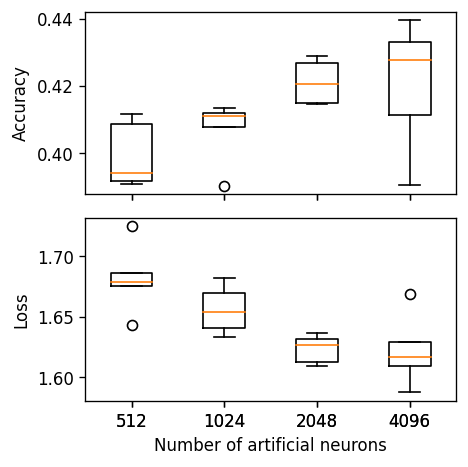

In [ ]:
losses = np.zeros((n_repetitions, 4))
accurs = np.zeros((n_repetitions, 4))

for i, n_neurons in enumerate([512,1024,2048,4096]):
    sample = df[(df['n_neurons'] == n_neurons) & (df['n_layers'] == 1) & (df['dropout'] == 0.25) & (df['optimizer'] == 'adam') & (df['epochs'] == 5)]
    loss   = sample[[f'loss {i}' for i in range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, labels=[512,1024,2048,4096])
ax[1].boxplot(losses, labels=[512,1024,2048,4096])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Number of artificial neurons')
fig.align_ylabels()
plt.tight_layout()


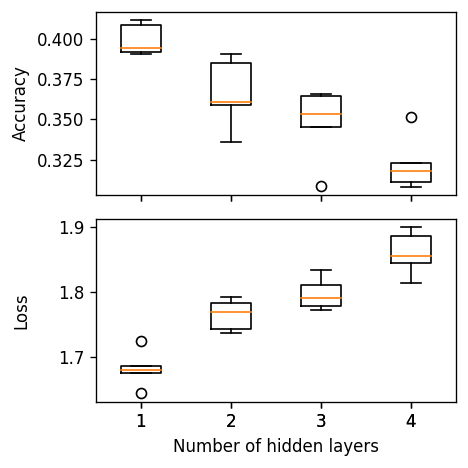

In [ ]:
losses = np.zeros((n_repetitions, 4))
accurs = np.zeros((n_repetitions, 4))

for i, n_layers in enumerate([1,2,3,4]):
    sample = df[(df['n_neurons'] == 512) & (df['n_layers'] == n_layers)& (df['dropout'] == 0.25) & (df['optimizer'] == 'adam') & (df['epochs'] == 5)]
    loss   = sample[[f'loss {i}' for i in  range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in  range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, labels=[1,2,3,4])
ax[1].boxplot(losses, labels=[1,2,3,4])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Number of hidden layers')
fig.align_ylabels()
plt.tight_layout()

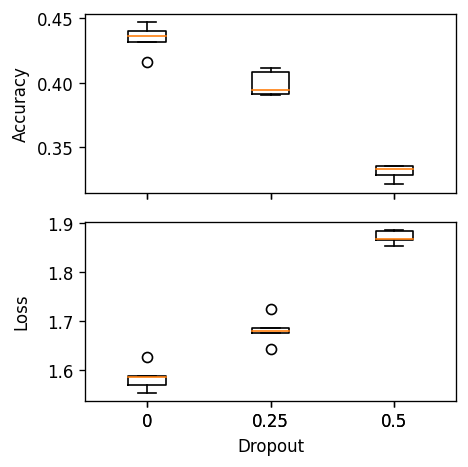

In [ ]:
losses = np.zeros((n_repetitions, 3))
accurs = np.zeros((n_repetitions, 3))

for i, dropout in enumerate([0, 0.25, 0.5]):
    sample = df[(df['n_neurons'] == 512) & (df['n_layers'] == 1)& (df['dropout'] == dropout) & (df['optimizer'] == 'adam') & (df['epochs'] == 5)]
    loss   = sample[[f'loss {i}' for i in  range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in  range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, labels=[0,0.25,0.5])
ax[1].boxplot(losses, labels=[0,0.25,0.5])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Dropout')
fig.align_ylabels()
plt.tight_layout()

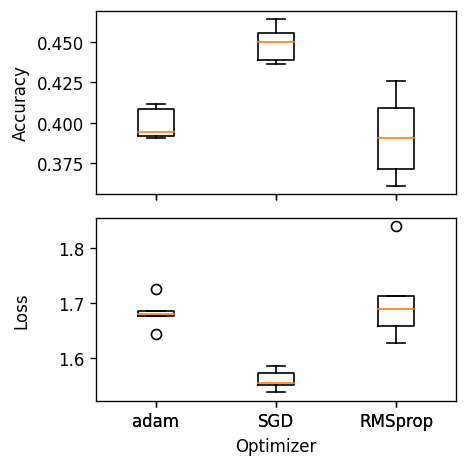

In [ ]:
losses = np.zeros((n_repetitions, 3))
accurs = np.zeros((n_repetitions, 3))

for i, optimizer in enumerate(['adam','SGD','RMSprop']):
    sample = df[(df['n_neurons'] == 512) & (df['n_layers'] == 1)& (df['dropout'] == 0.25) & (df['optimizer'] == optimizer) & (df['epochs'] == 5)]
    loss   = sample[[f'loss {i}' for i in  range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in  range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, labels=['adam','SGD','RMSprop'])
ax[1].boxplot(losses, labels=['adam','SGD','RMSprop'])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Optimizer')
fig.align_ylabels()
plt.tight_layout()

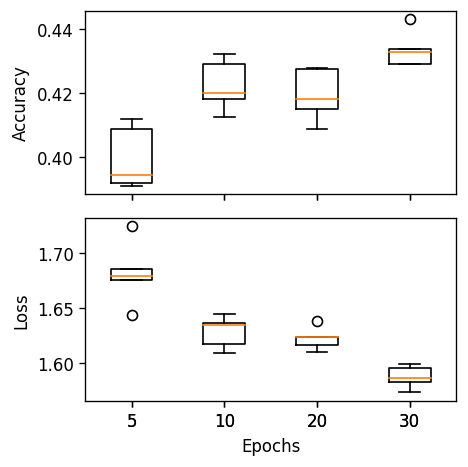

In [ ]:
losses = np.zeros((n_repetitions, 4))
accurs = np.zeros((n_repetitions, 4))

for i, epochs in enumerate([5,10,20,30]):
    sample = df[(df['n_neurons'] == 512) & (df['n_layers'] == 1)& (df['dropout'] == 0.25) & (df['optimizer'] == 'adam') & (df['epochs'] == epochs)]
    loss   = sample[[f'loss {i}' for i in  range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in  range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, labels=[5,10,20,30])
ax[1].boxplot(losses, labels=[5,10,20,30])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
fig.align_ylabels()
plt.tight_layout()

In [18]:
# Please, replace the values obtained by the simplified grid search here and execute the code
d = model_and_evaluate(n_neurons=4096,
                       n_layers=1,
                       dropout=0,
                       optimizer='SGD',
                       epochs=30)

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8284 - accuracy: 0.3487
Epoch 2/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6438 - accuracy: 0.4247
Epoch 3/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5659 - accuracy: 0.4525
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5133 - accuracy: 0.4704
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4717 - accuracy: 0.4866
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4343 - accuracy: 0.4997
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3990 - accuracy: 0.5162
Epoch 8/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3706 - accuracy: 0.5222
Epoch 9/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3442 - accuracy: 0.5317
Epoch 10/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.317